In [1]:
import numpy as np
import networkx as nx
# import tensorflow as tf
import math

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Embedding
from matplotlib.lines import Line2D
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['text.usetex'] = True

In [2]:
acc_unweighted = {'total': 76.79,
                  '(0,0)': 64.27,
                  '(1,1)': 79.08,
                  '(0,1)': 70.28,
                  'var': 38.91,
                  'max_diff': 14.81}


### alpha=0.5, p=0
acc_fairwalk =   {'total': 74.66,
                  '(0,0)': 68.37,
                  '(1,1)': 75.16,
                  '(0,1)': 73.98,
                  'var': 13.77,
                  'max_diff': 7.47}


### alpha=0.5, p=2
acc_proposed =   {'total': 73.26,
                  '(0,0)': 73.50,
                  '(1,1)': 73.03,
                  '(0,1)': 73.99,
                  'var': 3.75,
                  'max_diff': 4.19}


# ### alpha=0.5, p=4
# acc_proposed =   {'total': 71.62,
#                   '(0,0)': 71.69,
#                   '(1,1)': 70.98,
#                   '(0,1)': 74.16,
#                    'var': 8.08
#                   'max_diff': 6.17}


uw = np.array([0.0923, acc_unweighted['total'], acc_unweighted['var']])
alpha0_3_p_2 = np.array([0.0615, 77.39, 13.22])
alpha0_5_p_2 = np.array([0.0168, acc_proposed['total'], acc_proposed['var']])
alpha0_7_p_2 = np.array([0.0095, 70.56, 18.15])
rnd = np.array([0.011, 51.85, 7.12])

red_ = '#fab3ac'
blue_ = '#29a5e3'
cyan_ = '#d2f0f7'
green_ = '#a3f77e'
gray_ = '#dbdbdb'
purple_ = '#BF55EC'
yellow_ = '#F7CA18'

In [3]:
def get_bar_plot_all(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [1- 3*bar_width/2, 1 - bar_width/2, 1 + bar_width/2, 1 + 3*bar_width/2]
    xp = [4 - 3*bar_width/2, 4 - bar_width/2, 4 + bar_width/2, 4 + 3*bar_width/2]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], acc_unweighted['total'], bar_width, color = green_, edgecolor='black')
    ax.bar(xp[0], acc_proposed['total'], bar_width, color = blue_, edgecolor='black')
    
    ax.bar(xu[1], acc_unweighted['(1,1)'], bar_width, color = green_, hatch='//', edgecolor='black')
    ax.bar(xp[1], acc_proposed['(1,1)'], bar_width, color = blue_, hatch='//', edgecolor='black')
        
    ax.bar(xu[2], acc_unweighted['(0,0)'], bar_width, color = green_, hatch='\\\\', edgecolor='black')
    ax.bar(xp[2], acc_proposed['(0,0)'], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
    ax.bar(xu[3], acc_unweighted['(0,1)'], bar_width, color = green_, hatch='--', edgecolor='black')
    ax.bar(xp[3], acc_proposed['(0,1)'], bar_width, color = blue_, hatch='--', edgecolor='black')
    
    ax.bar(xu[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
    ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='A-A', edgecolor='black')
    ax.bar(xu[2], 0, bar_width, color = gray_, hatch='\\\\', label='B-B', edgecolor='black')
    ax.bar(xu[3], 0, bar_width, color = gray_, hatch='--', label='A-B', edgecolor='black')

    plt.legend(loc='upper center', prop={'size': legend_size}) #'upper left')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([1, 4], [' ', ' '])
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    
    fig.savefig('fig/link_prediction_rice/rice-bar-all.pdf',bbox_inches='tight')
    

In [4]:
def get_bar_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2]
    xf = [5.5 - bar_width, 5.5]
    xp = [9 - bar_width, 9]
    
    
    print(acc_unweighted['var'])
    print(acc_fairwalk['var'])
    print(acc_proposed['var'])
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], acc_unweighted['total'], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(xf[0], acc_fairwalk['total'], bar_width, color = purple_, edgecolor='black')
    ax.bar(xp[0], acc_proposed['total'], bar_width, color = purple_, edgecolor='black')
    
#     ax.bar(xu[1], acc_unweighted['max_diff'], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], acc_proposed['max_diff'], bar_width, color = blue_, hatch='//', edgecolor='black')
    ax.bar(xu[1], acc_unweighted['var'], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(xf[1], acc_fairwalk['var'], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xp[1], acc_proposed['var'], bar_width, color = yellow_, edgecolor='black')


#     ax.bar(xu[0], 0, bar_width, color = gray_, label='Total Accuracy', edgecolor='black')
#     ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='Discrepancy', edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    #custom_lines = [Line2D([0], [0], color=green_, lw=3),
    #                Line2D([0], [0], color=blue_, lw=3)]
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
    #legend1 = plt.legend(custom_lines, ['DeepWalk', 'FairWalk'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='upper right',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([2, 5.5, 9], ['DeepWalk', 'FairWalk', 'CrossWalk'], fontsize=legend_size)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    
    fig.savefig('fig/link_prediction_rice/rice-bar.pdf',bbox_inches='tight')


In [5]:
def get_mmd_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2, 2 + bar_width]
    x0_3 = [6 - bar_width, 6, 6 + bar_width]
    x0_5 = [10 - bar_width, 10, 10 + bar_width]
    x0_7 = [14 - bar_width, 14, 14 + bar_width]
    xr = [18 - bar_width, 18, 18 + bar_width]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], 1000 * uw[0], bar_width, color = green_, edgecolor='black', label='MMD ✕ 1000')
    ax.bar(x0_3[0], 1000 * alpha0_3_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_5[0], 1000 * alpha0_5_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_7[0], 1000 * alpha0_7_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xr[0], 1000 * rnd[0], bar_width, color = green_, edgecolor='black')

    
    ax.bar(xu[1], uw[1], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(x0_3[1], alpha0_3_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_5[1], alpha0_5_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_7[1], alpha0_7_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(xr[1], rnd[1], bar_width, color = purple_, edgecolor='black')

    ax.bar(xu[2], uw[2], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(x0_3[2], alpha0_3_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_5[2], alpha0_5_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_7[2], alpha0_7_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xr[2], rnd[2], bar_width, color = yellow_, edgecolor='black')

    
#     ax.bar(xu[1], acc_unweighted['max_diff'], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], acc_proposed['max_diff'], bar_width, color = blue_, hatch='//', edgecolor='black')



#     ax.bar(xu[0], 0, bar_width, color = gray_, label='Total Accuracy', edgecolor='black')
#     ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='Discrepancy', edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    #custom_lines = [Line2D([0], [0], color=green_, lw=3),
    #                Line2D([0], [0], color=blue_, lw=3)]
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
    #legend1 = plt.legend(custom_lines, ['DeepWalk', 'FairWalk'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='upper right',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([2, 6, 10, 14, 18], ['DeepWalk', 'CrossWalk\nα=0.3, p=2', 'CrossWalk\nα=0.5, p=2', 'CrossWalk\nα=0.7, p=2', 'Random\nEmbedding'], fontsize = 18)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
        
    fig.savefig('fig/link_prediction_rice/rice_mmd.pdf',bbox_inches='tight')

In [6]:
def get_legend():
    params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(figsize=(8,.015))
    custom_lines = [
            Line2D([0], [0], color='green', lw=3), 
            Line2D([0], [0], color='blue', lw=3)]
    legend1 = plt.legend(custom_lines, ['Deepwalk + Logistic regression', 'Reweighting + Deepwalk + Logistic regression'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)
    plt.gca().add_artist(legend1)
    plt.axis('off')
    fig.savefig('fig/link_prediction_rice/legend.pdf', bbox_inches='tight')

38.91
13.77
3.75


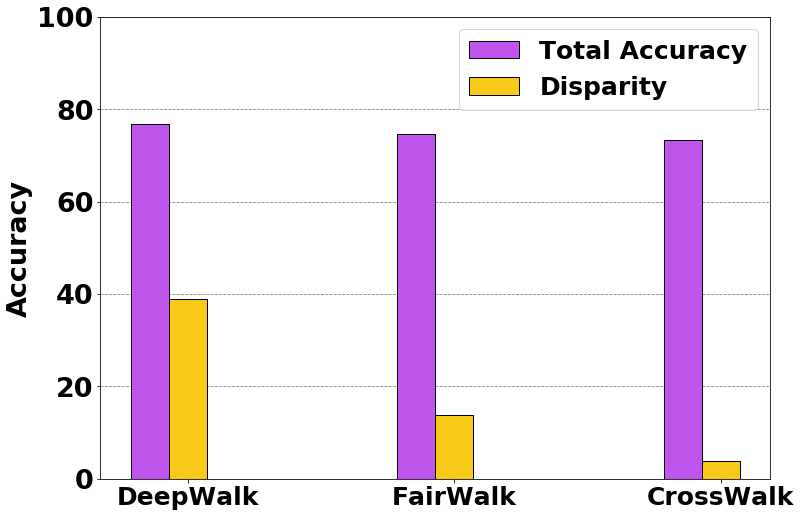

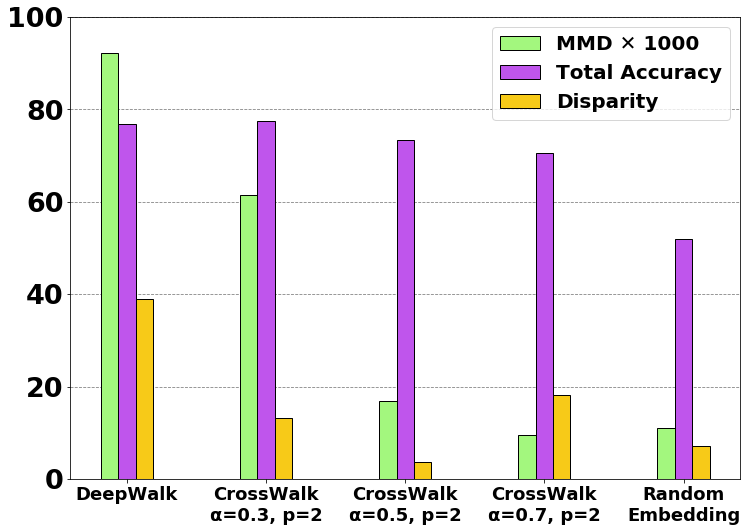

In [7]:
# Plotting the square plots
# Real Plots

label_size = 27
font_size = 24
image_size = (12, 8.5)
line_width = 3
bar_width = 0.5

y_lim = [0, 100]
get_bar_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=25)

# y_lim = [50, 85]
# get_bar_plot_all(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=20)
# get_legend()

y_lim = [0, 100]
get_mmd_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=20)

In [8]:
(38.91 - 3.75) / 38.91

0.9036237471087124